<a href="https://colab.research.google.com/github/YasaminRhd/Pythonia.init/blob/main/Session%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys 
from IPython.display import display
from PIL import Image
import glob
from sklearn import svm 
from sklearn.neighbors import NearestCentroid 

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Reading Data 


In [ ]:
def readImages(filePath):
  cv_img = []
  for img in glob.glob(filePath):
      n = cv.imread(img)
      cv_img.append(n)
  return cv_img

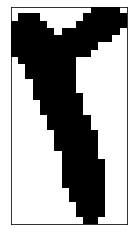

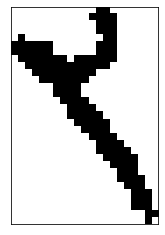

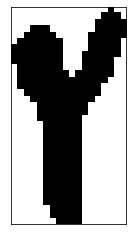

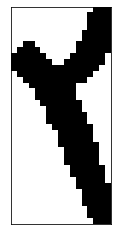

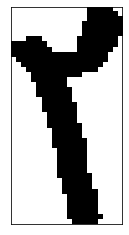

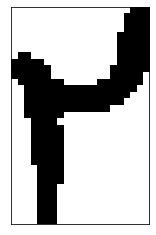

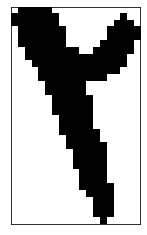

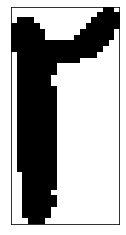

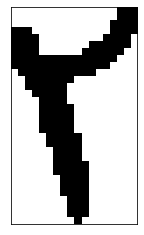

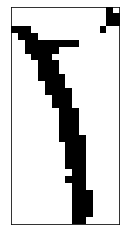

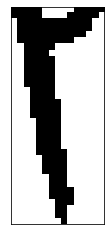

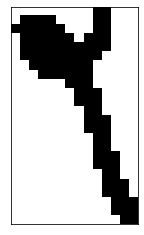

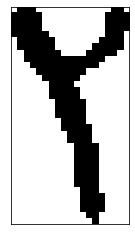

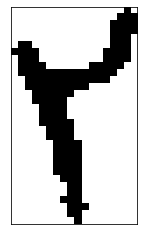

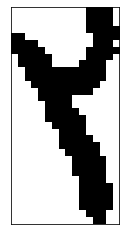

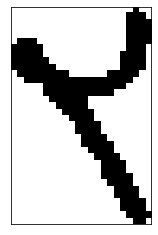

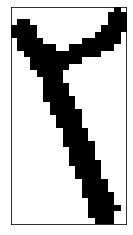

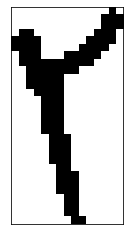

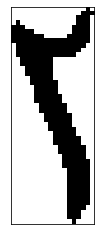

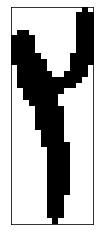

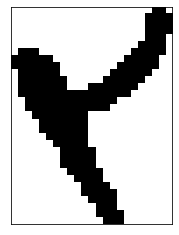

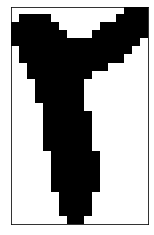

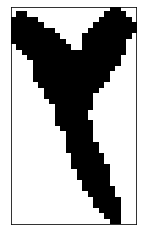

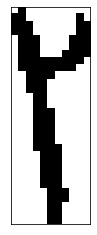

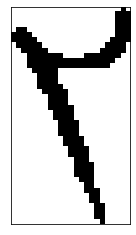

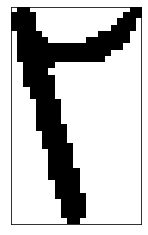

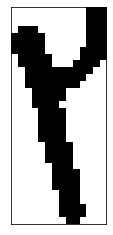

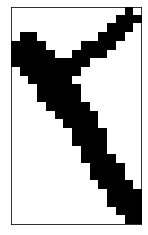

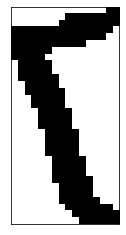

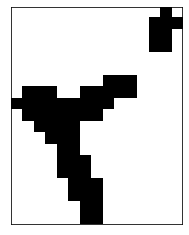

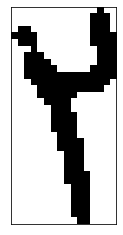

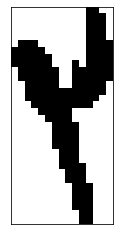

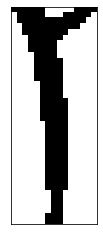

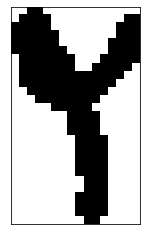

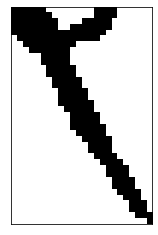

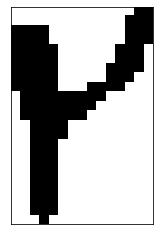

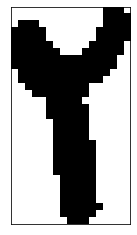

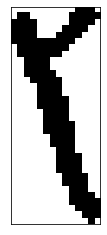

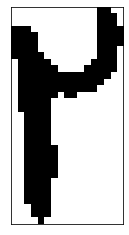

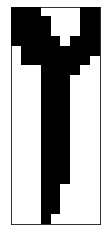

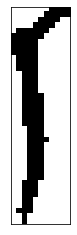

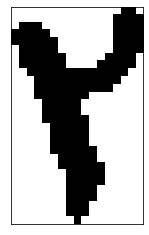

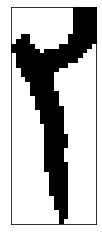

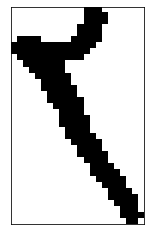

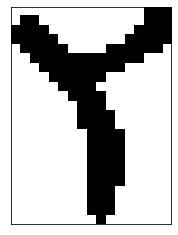

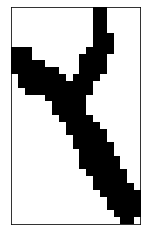

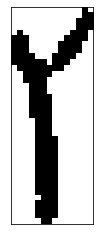

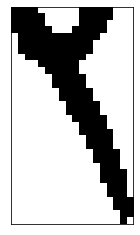

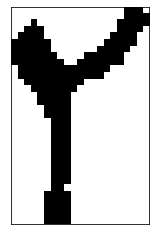

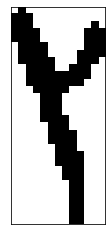

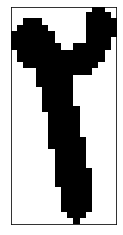

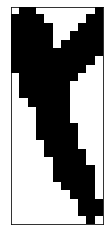

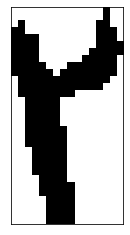

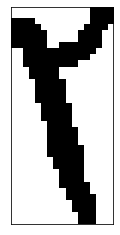

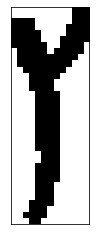

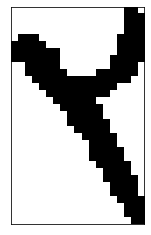

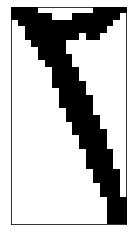

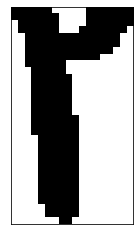

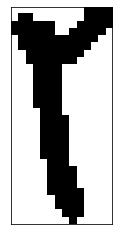

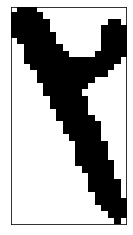

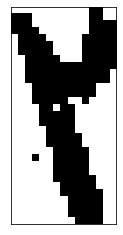

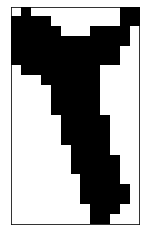

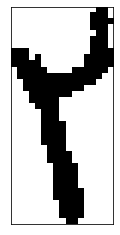

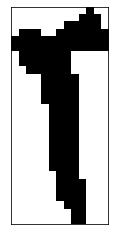

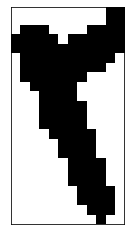

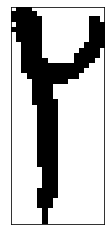

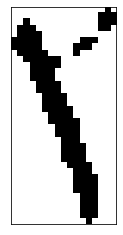

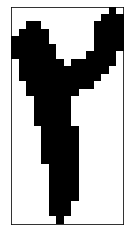

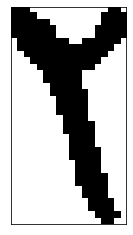

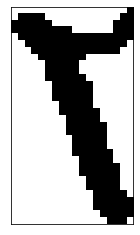

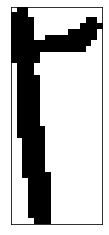

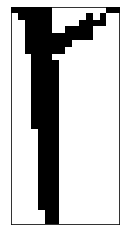

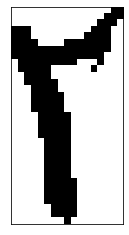

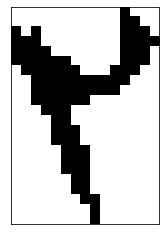

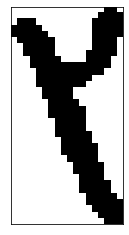

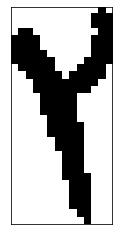

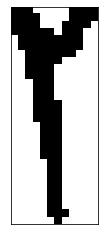

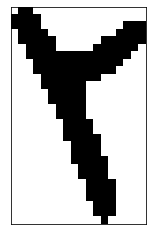

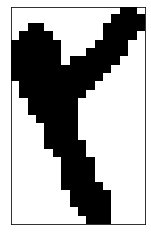

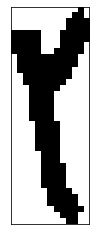

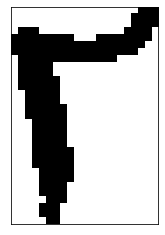

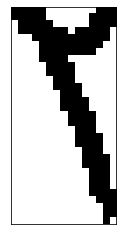

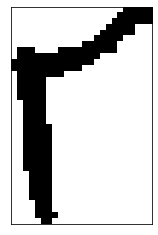

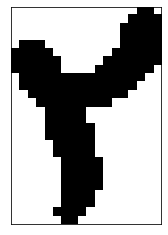

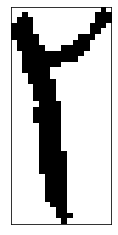

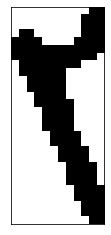

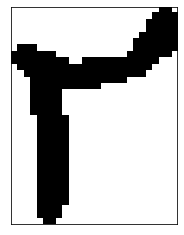

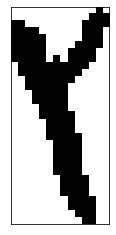

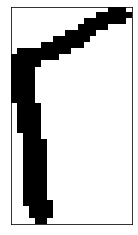

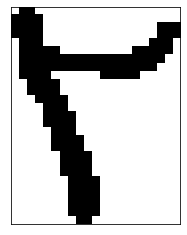

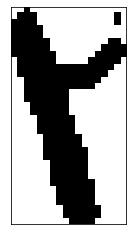

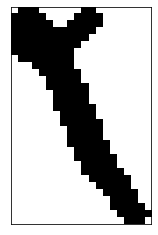

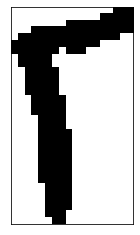

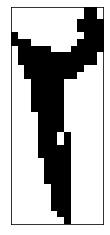

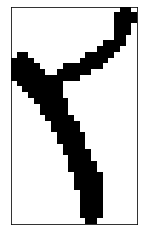

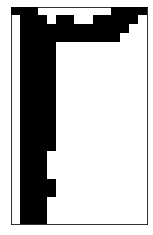

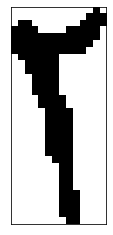

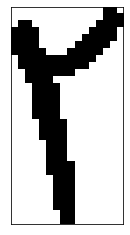

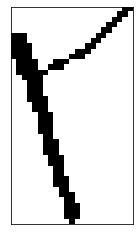

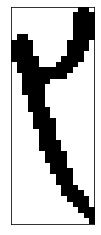

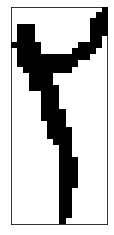

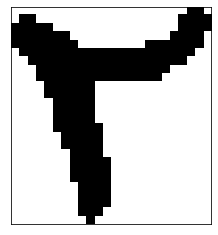

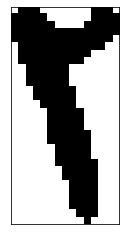

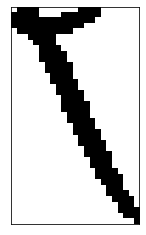

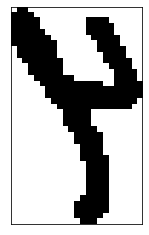

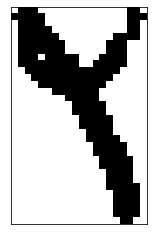

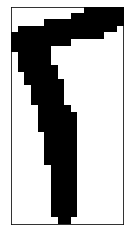

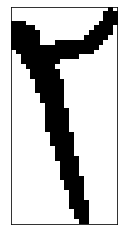

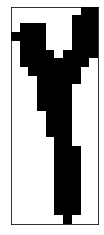

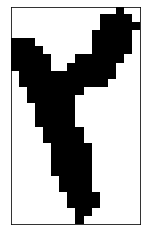

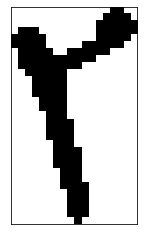

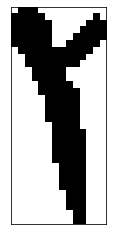

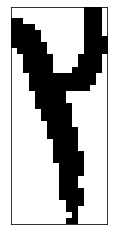

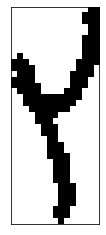

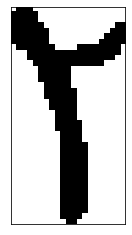

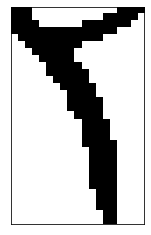

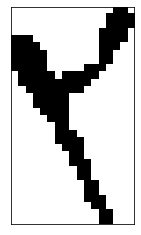

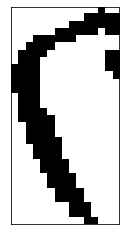

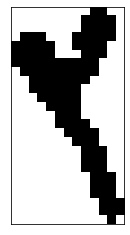

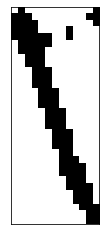

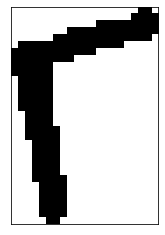

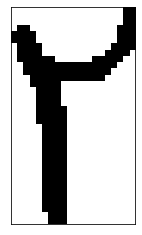

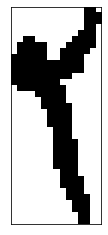

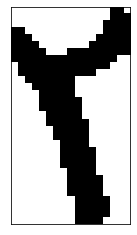

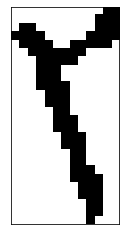

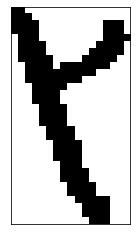

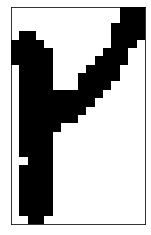

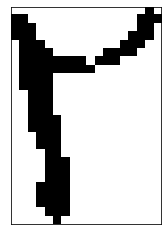

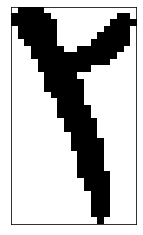

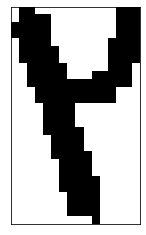

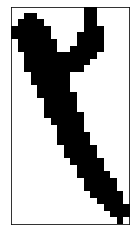

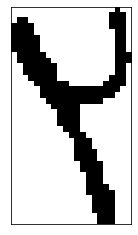

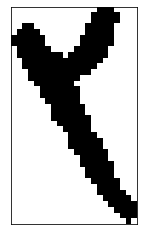

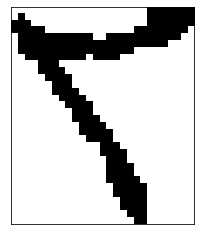

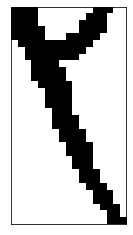

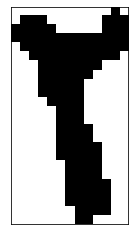

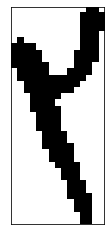

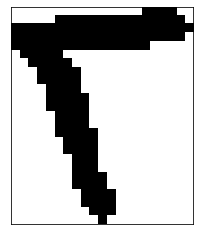

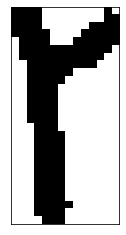

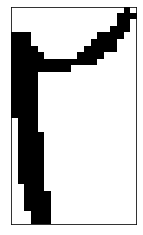

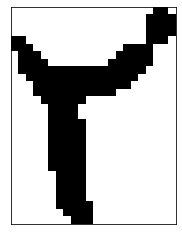

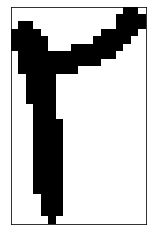

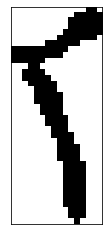

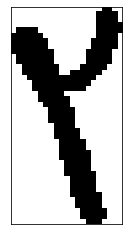

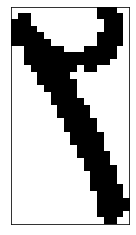

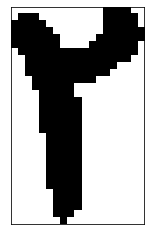

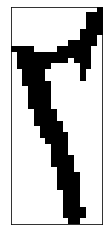

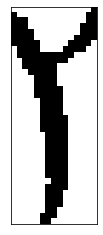

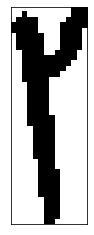

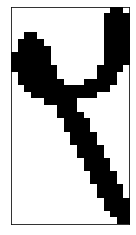

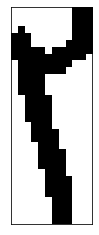

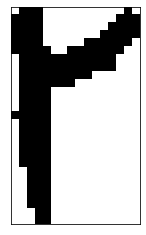

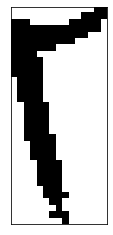

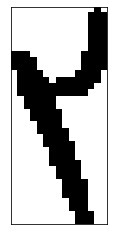

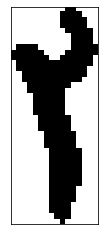

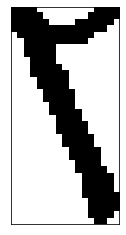

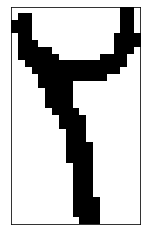

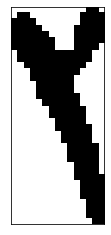

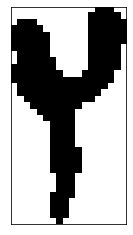

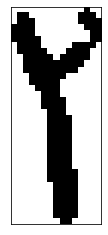

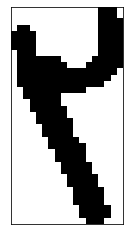

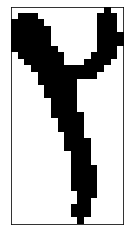

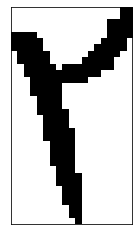

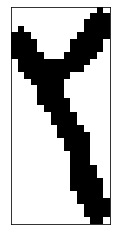

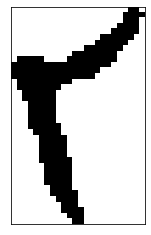

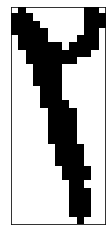

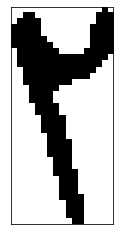

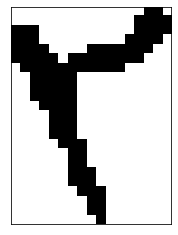

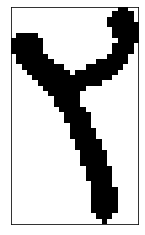

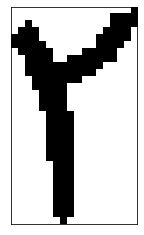

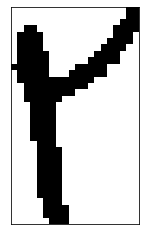

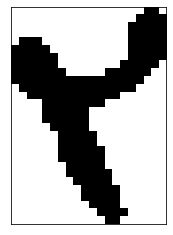

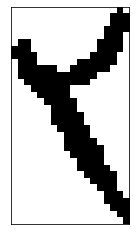

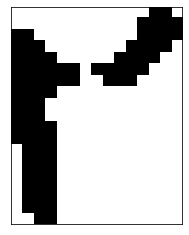

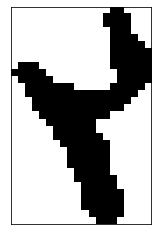

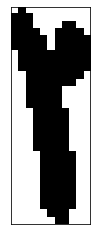

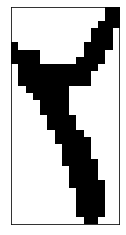

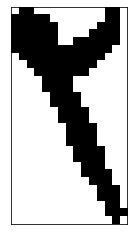

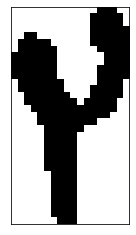

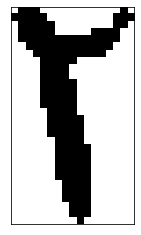

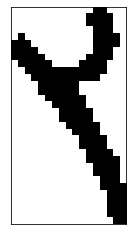

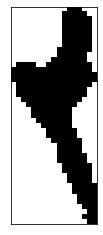

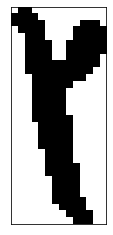

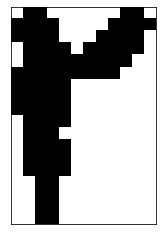

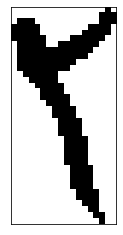

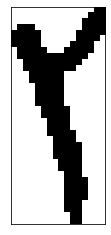

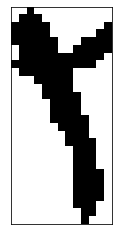

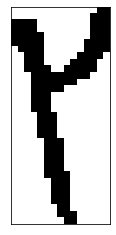

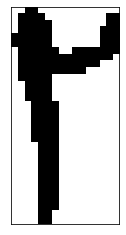

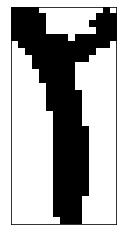

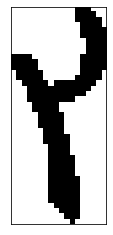

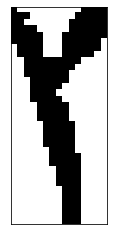

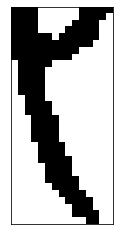

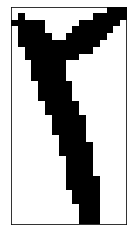

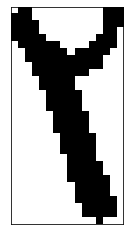

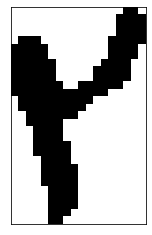

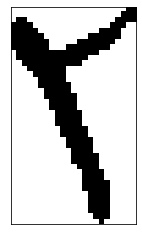

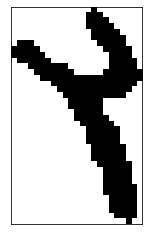

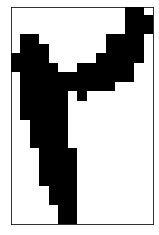

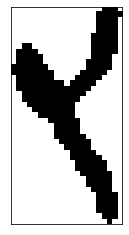

In [ ]:
the1img = readImages("/content/gdrive/MyDrive/HodaSmallSubset/1/*.png")
the2img = readImages("/content/gdrive/MyDrive/HodaSmallSubset/2/*.png")
the5img = readImages("/content/gdrive/MyDrive/HodaSmallSubset/5/*.png")

#check if reading process was successful 
for i in the2img:
  plt.imshow(i)
  plt.xticks([]), plt.yticks([])
  plt.show()

#Descriptor


In [ ]:
def descriptor(img):
  dim = (3,3)
  resized = cv.resize(img,dim)
  return resized.flatten()

#Traning 



In [ ]:
x = []
y = []

for i in the1img:
  des = descriptor(i)
  x.append(des)
  y.append(0)

for i in the2img:
  des = descriptor(i)
  x.append(des)
  y.append(1)  

for i in the5img:
  des = descriptor(i)
  x.append(des)
  y.append(2) 

# clf = NearestCentroid()
# clf.fit(x,y)

clf = svm.SVC(kernel='rbf')
clf.fit(x,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#Test

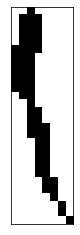

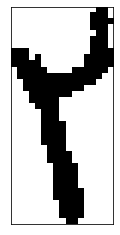

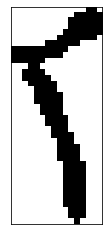

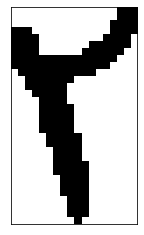

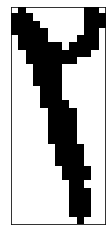

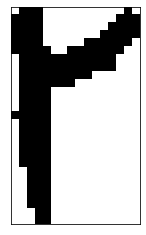

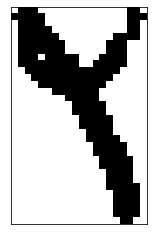

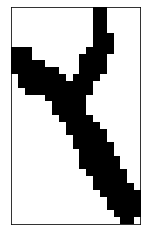

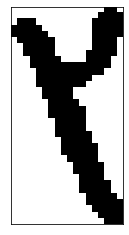

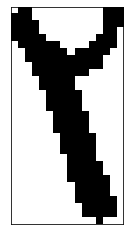

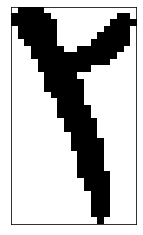

In [ ]:
test = readImages('/content/gdrive/MyDrive/HodaSmallSubset/mixed/*.png')

for i in test:
  des = descriptor(i)
  res = clf.predict([des])

  if (res[0]==1):
    plt.imshow(i)
    plt.xticks([]), plt.yticks([])
    plt.show()